In [4]:
import torch
import numpy as np
import matplotlib.pyplot as plt
import pandas as pd
%matplotlib inline

# Retina display
%config InlineBackend.figure_format = 'retina'

In [5]:
from tueplots import bundles
plt.rcParams.update(bundles.beamer_moml())


# Also add despine to the bundle using rcParams
plt.rcParams['axes.spines.right'] = False
plt.rcParams['axes.spines.top'] = False

# Increase font size to match Beamer template
plt.rcParams['font.size'] = 16
# Make background transparent
plt.rcParams['figure.facecolor'] = 'none'


In [9]:
## Rejection sampling

import torch.distributions as D

mix = D.Categorical(torch.ones(2,))
comp = D.Normal(torch.tensor([-0.5, 1.0]), torch.tensor([0.3, 0.5]))
mog = D.MixtureSameFamily(mix, comp)


In [7]:
comp.scale

tensor([0.3000, 0.5000])

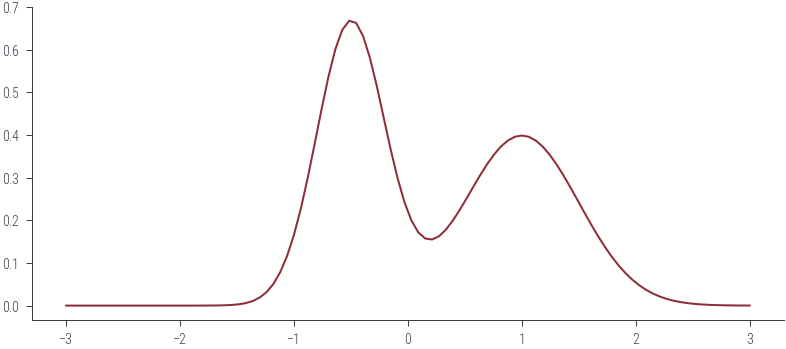

In [5]:
# Plot the mizxture of Gaussians
xs = torch.linspace(-3, 3, 100)
plt.plot(xs, mog.log_prob(xs).exp())

In [6]:
# Take a proposal distribution q(x) = N(0, 1)
q = D.Normal(0, 1)

In [7]:
# Let $M$ be a constant such that $M \geq \frac{p(x)}{q(x)} \forall x$.

M = torch.max(mog.log_prob(xs) - q.log_prob(xs)).exp()
M

tensor(1.9451)

In [8]:
torch.argmax(mog.log_prob(xs) - q.log_prob(xs))

tensor(72)

In [9]:
xs[31]

tensor(-1.1212)

No artists with labels found to put in legend.  Note that artists whose label start with an underscore are ignored when legend() is called with no argument.


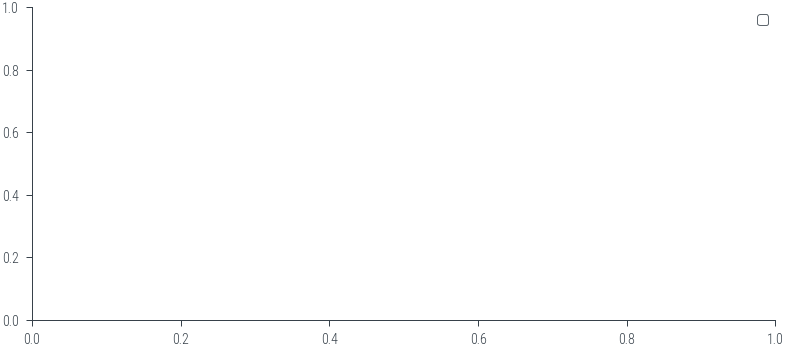

In [10]:
def plot_base():
    # Plot the mixture of Gaussians
    
    plt.legend()
plot_base()

In [13]:
# Sample from the proposal distribution and accept or reject.
# Accepted shown in green, rejected shown in red.

def plot_sample(x, show_q = False, show_Mq = False, show_sample=False, show_vline = False,
                  show_px=False, show_Mqx=False, show_uMqx=False, show_accept=False):
    xs = torch.linspace(-3, 3, 100)
    plt.plot(xs, mog.log_prob(xs).exp(), label=r'$\tilde{p}(x)$', color='C0')
    plt.title(r"Target distribution $\tilde{p}(x)$")

    if show_q:
        # Plot the proposal distribution
        plt.plot(xs, q.log_prob(xs).exp(), label='$q(x)$', color='C1')
        plt.title(r"Proposal distribution $q(x)$")

    if show_Mq:
        # Plot the scaled proposal distribution
        plt.plot(xs, M * q.log_prob(xs).exp(), label='$Mq(x)$', color='C2', linestyle='--')
        plt.title("Scaled proposal distribution Mq(x)")
    if show_sample:
        plt.scatter(x, 0,marker='x', color='k', label = r"$x\sim q(x)$")
        plt.title("Sample from proposal distribution")
    
    if show_vline:
        plt.axvline(x, color='C3', linestyle='--')
        plt.title("Sample from proposal distribution")

    if show_px:
        plt.scatter(x, mog.log_prob(x).exp(), color='C4', label=r"$\tilde{p}(x)$")
        plt.title(r"Evaluate target distribution $\tilde{p}(x)$ at sample x")

    
    if show_Mqx:
        plt.scatter(x, M * q.log_prob(x).exp(), color='k', label=r"$Mq(x)$")
        plt.title(r"Evaluate scaled proposal distribution $Mq(x)$ at sample x")
    
    if show_uMqx:
        torch.manual_seed(0)
        u = torch.rand(1)
        plt.scatter(x, u * M * q.log_prob(x).exp(), label=r"$uMq(x)$", color='purple')
        plt.title(r"Draw a uniform u between 0 and 1 and evaluate $uMq(x)$ at sample x")
    
    if show_accept:
        if u * M * q.log_prob(x).exp() < mog.log_prob(x).exp():
            plt.scatter(x, u * M * q.log_prob(x).exp(), label=r"Accepted", color='g')
            plt.title(r"Accept sample as $uMq(x)$ $<$ $\tilde{p}(x)$")
        else:
            plt.scatter(x, u * M * q.log_prob(x).exp(), label=r"Rejected", color='r')
            plt.title(r"Reject sample as $uMq(x)$ $>$ $\tilde{p}(x)$")
    
    plt.ylim(-.05, 1.0)
    plt.legend()
    fn  = f"../figures/sampling/rejection-sampling-{x:0.1f}-{show_q}-{show_Mq}-{show_sample}-{show_vline}-{show_px}-{show_Mqx}-{show_uMqx}-{show_accept}"
    plt.savefig(fn + ".pdf", bbox_inches='tight')
    plt.savefig(fn + ".png", bbox_inches='tight', dpi=600)

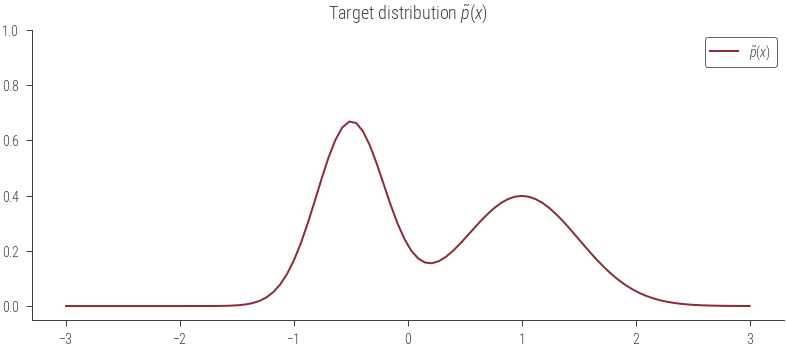

In [14]:
plot_sample(torch.tensor(-1.0))

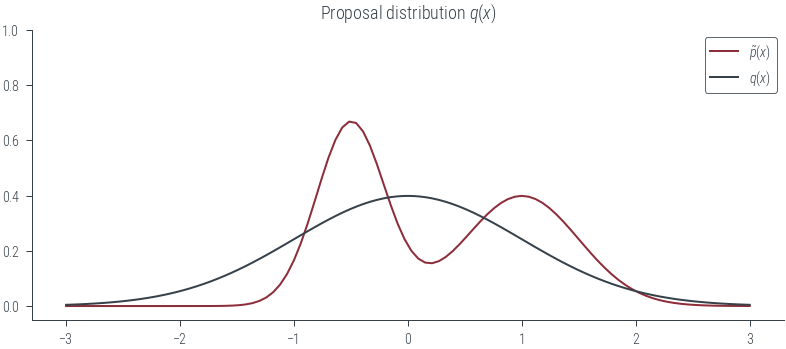

In [15]:
plot_sample(torch.tensor(-1.0), show_q=True)

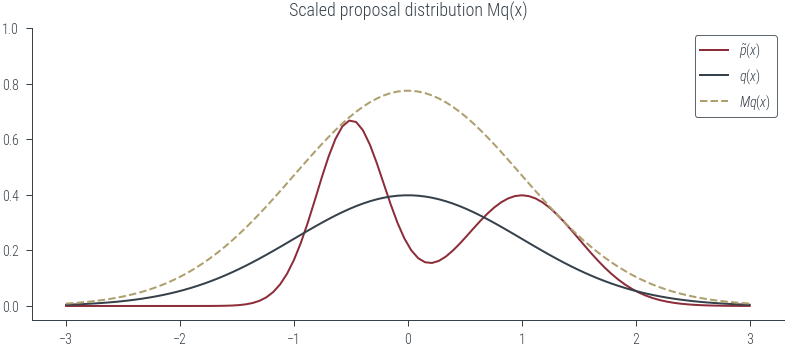

In [16]:
plot_sample(torch.tensor(-1.0), show_q=True, show_Mq=True)

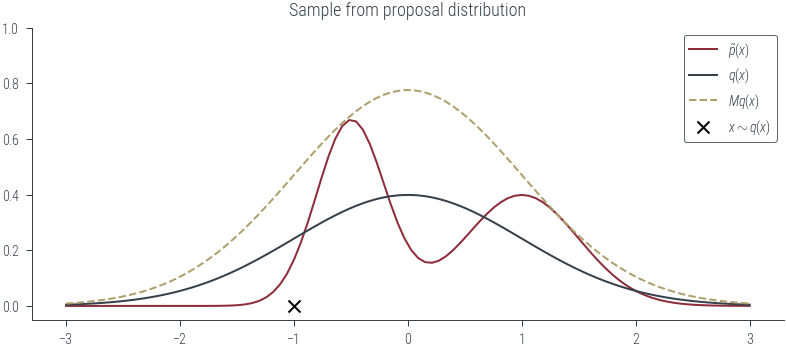

In [17]:
plot_sample(torch.tensor(-1.0), show_q=True, show_Mq=True, show_sample=True)

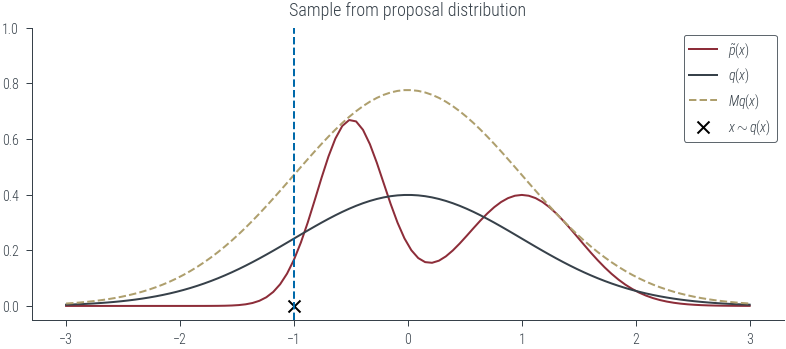

In [18]:
plot_sample(torch.tensor(-1.0), show_q=True, show_Mq=True, show_sample=True, show_vline=True)

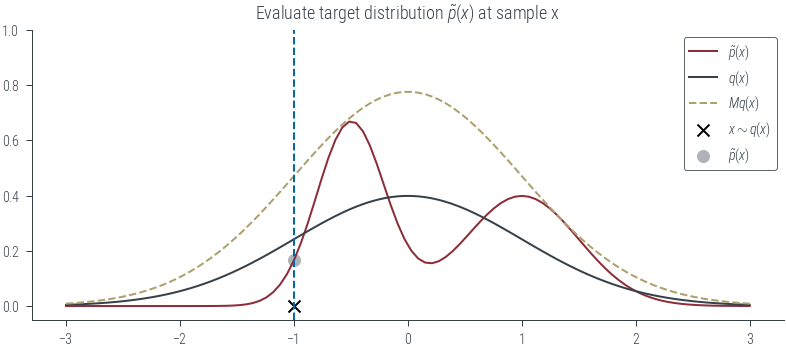

In [19]:
plot_sample(torch.tensor(-1.0), show_q=True, show_Mq=True, show_sample=True, show_vline=True, show_px=True)

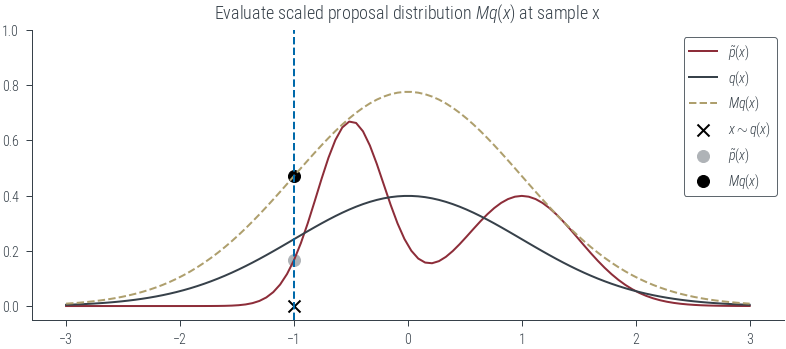

In [20]:
plot_sample(torch.tensor(-1.0), show_q=True, show_Mq=True, show_sample=True, show_vline=True, show_px=True, show_Mqx=True)

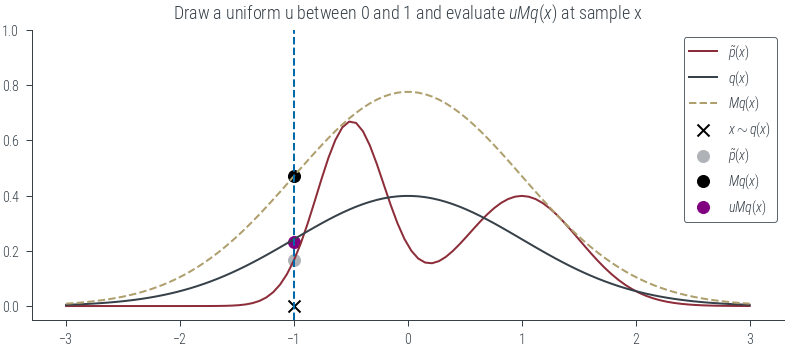

In [21]:
plot_sample(torch.tensor(-1.0), show_q=True, show_Mq=True, show_sample=True, show_vline=True, show_px=True, show_Mqx=True, show_uMqx=True)

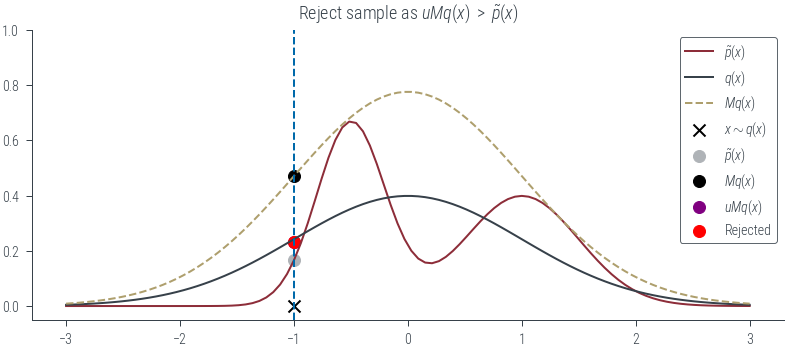

In [22]:
plot_sample(torch.tensor(-1.0), show_q=True, show_Mq=True, show_sample=True, show_vline=True, show_px=True, show_Mqx=True, show_uMqx=True, show_accept=True)

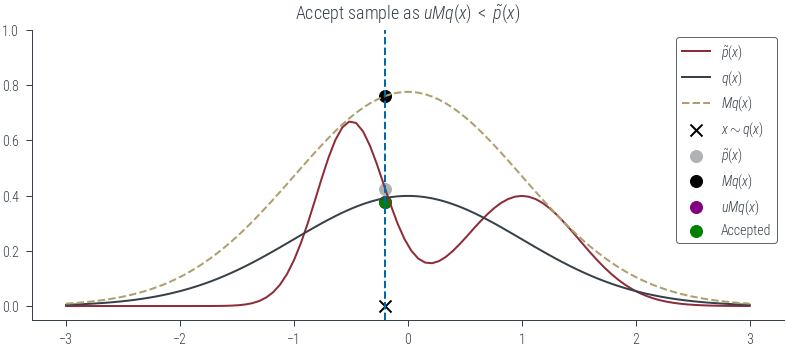

In [23]:
plot_sample(torch.tensor(-0.2), show_q=True, show_Mq=True, show_sample=True, show_vline=True, show_px=True, show_Mqx=True, show_uMqx=True, show_accept=True)

In [50]:
# Create an animation out of the .png generated above
import os
import imageio
import glob

images = []
# Get all the pngs in the figures directory
fs = sorted(glob.glob('../figures/sampling/rejection-sampling*.png'))
for filename in fs:
    ist = imageio.imread(filename)
    images.append(ist)
    # Print image size to make sure they are all the same size
    print(ist.shape)

# Save with high resolution
imageio.mimsave('../figures/sampling/rejection-sampling.gif', images, duration=0.6)
# save as mp4
# os.system("ffmpeg -i figures/sampling/rejection-sampling.gif figures/sampling/rejection-sampling.mp4")



/tmp/ipykernel_69700/3473788105.py:10: DeprecationWarning: Starting with ImageIO v3 the behavior of this function will switch to that of iio.v3.imread. To keep the current behavior (and make this warning disappear) use `import imageio.v2 as imageio` or call `imageio.v2.imread` directly.
  ist = imageio.imread(filename)


(1456, 3275, 4)
(1456, 3275, 4)
(1456, 3275, 4)
(1456, 3275, 4)
(1456, 3275, 4)
(1456, 3275, 4)
(1456, 3275, 4)
(1456, 3275, 4)
(1456, 3275, 4)


![](../figures/sampling/rejection-sampling.gif)

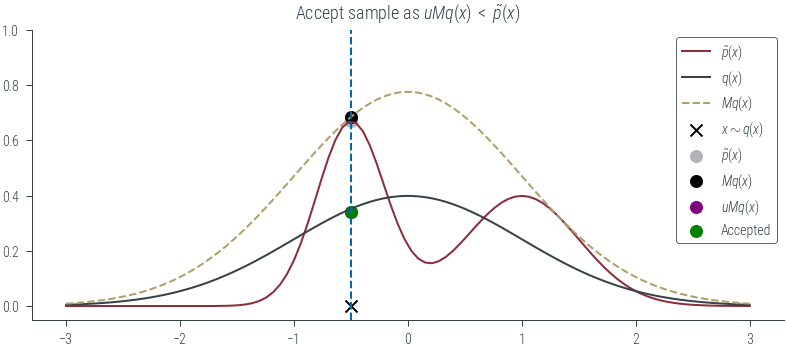

In [24]:
plot_sample(torch.tensor(-0.5), show_q=True, show_Mq=True, show_sample=True, show_vline=True, show_px=True, show_Mqx=True, show_uMqx=True, show_accept=True)

../figures/sampling/rejection-sampling-N1000-False.pdf


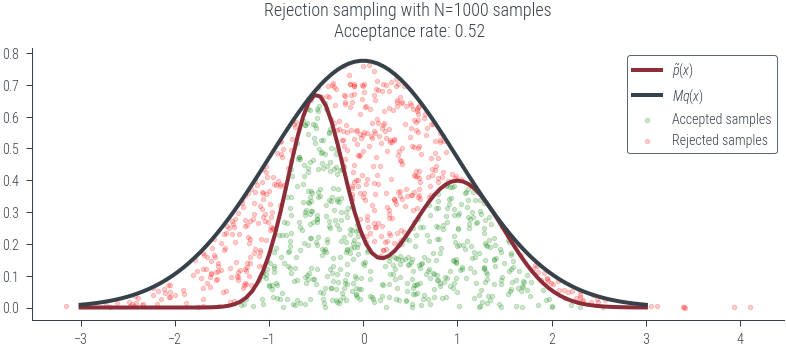

In [26]:
N = 1000

def plot_N_samples(N=100, seed=0, plot_kde=False):
    torch.manual_seed(seed)
    # Now, run the algorithm for a few iterations and plot the results
    samples_from_q = q.sample((N,))

    # Evaluate the target distribution at the samples
    pxs = mog.log_prob(samples_from_q).exp()

    # Evaluate the scaled proposal distribution at the samples
    Mqxs = M * q.log_prob(samples_from_q).exp()

    # Draw a uniform u between 0 and 1
    us = torch.rand(N)

    # Accept or reject the samples
    accepted = us * Mqxs < pxs

    # Plot p, q, and Mq
    plt.plot(xs, mog.log_prob(xs).exp(), label=r'$\tilde{p}(x)$', lw=2)
    #plt.plot(xs, q.log_prob(xs).exp(), label='q(x)')
    plt.plot(xs, M * q.log_prob(xs).exp(), label=r'$Mq(x)$', lw=2)

    if not plot_kde:

        # Plot the sample as red if it was rejected, and green if it was accepted, height is p(x)
        #plt.scatter(samples_from_q, pxs, color='r', label='Rejected samples')
        plt.scatter(samples_from_q[accepted], (us*Mqxs)[accepted], color='g', label='Accepted samples', alpha=0.2, marker='.', s=20)
        plt.scatter(samples_from_q[~accepted], (us*Mqxs)[~accepted], color='r', label='Rejected samples', alpha=0.2, marker='.', s=20)
        plt.legend()

    if plot_kde:
        import seaborn as sns
        sns.kdeplot(samples_from_q[accepted].numpy(), color='g', label='Density of accepted samples', lw=2)
        plt.legend()
    plt.title(f"Rejection sampling with N={N} samples\n Acceptance rate: {accepted.float().mean().item():.2f}")
    fn = f"../figures/sampling/rejection-sampling-N{N}-{plot_kde}.pdf"
    plt.savefig(fn, bbox_inches='tight')
    print(fn)

plot_N_samples(N=1000, seed=0)

../figures/sampling/rejection-sampling-N1000-True.pdf


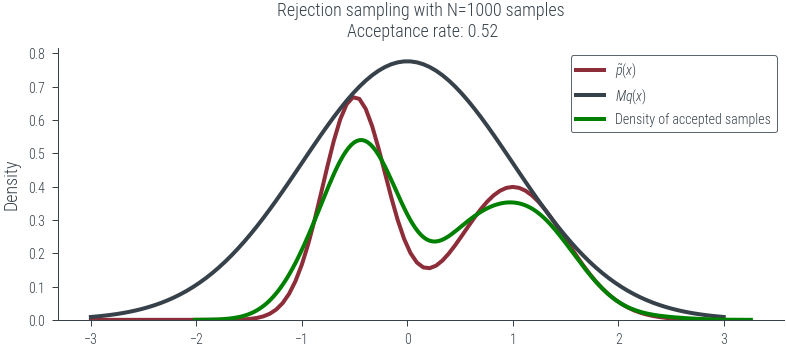

In [28]:
plot_N_samples(N=1000, seed=0, plot_kde=True)

../figures/sampling/rejection-sampling-N10-True.pdf


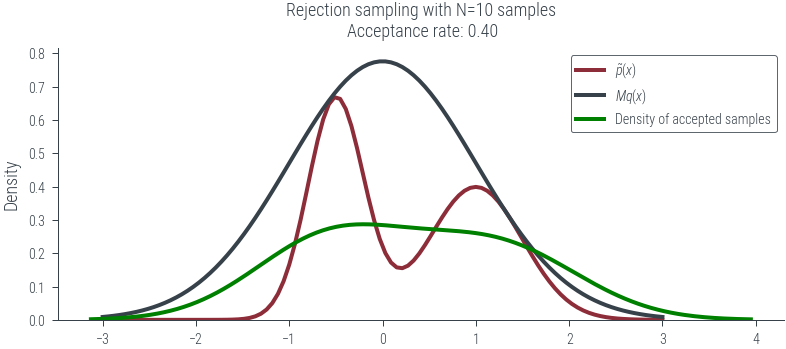

In [29]:
plot_N_samples(N=10, seed=0, plot_kde=True)


../figures/sampling/rejection-sampling-N10-False.pdf


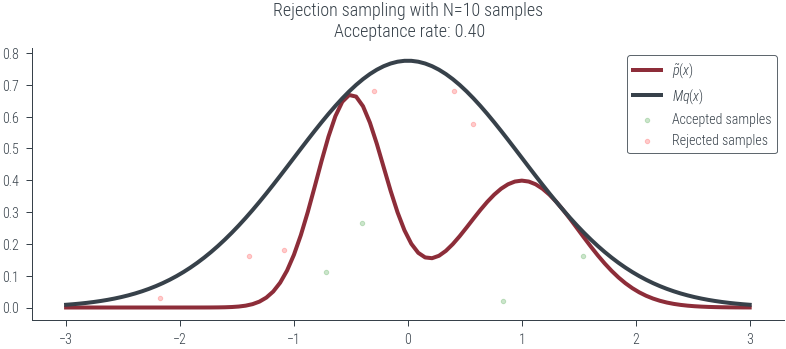

In [30]:
plot_N_samples(N=10, seed=0, plot_kde=False)

../figures/sampling/rejection-sampling-N10000-True.pdf


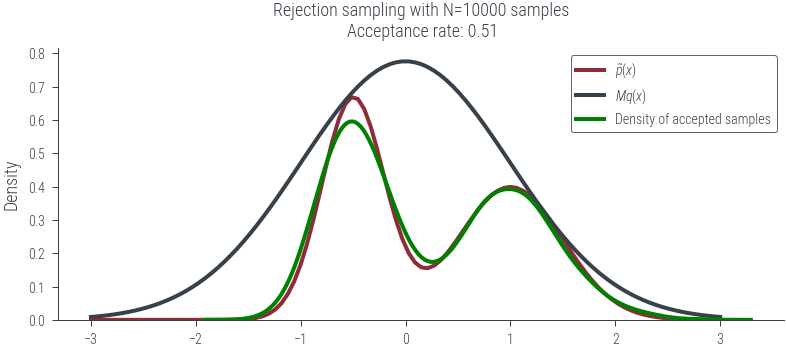

In [31]:
plot_N_samples(N=10000, seed=0, plot_kde=True)

../figures/sampling/rejection-sampling-N10000-False.pdf


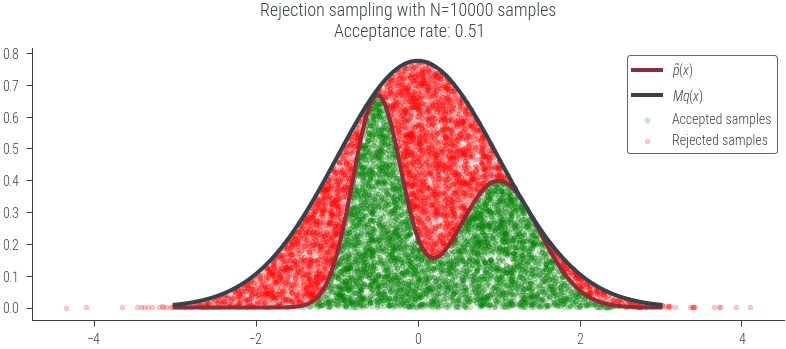

In [32]:
plot_N_samples(N=10000, seed=0, plot_kde=False)

In [12]:
# Gaussian p and q

sigma_p = 1.0
sigma_q = 1.1

DIM = 1

p = D.MultivariateNormal(torch.zeros(DIM), sigma_p**2 * torch.eye(DIM))
q = D.MultivariateNormal(torch.zeros(DIM), sigma_q**2 * torch.eye(DIM))


In [13]:
p

MultivariateNormal(loc: tensor([0.]), covariance_matrix: tensor([[1.]]))

In [14]:
q

MultivariateNormal(loc: tensor([0.]), covariance_matrix: tensor([[1.2100]]))

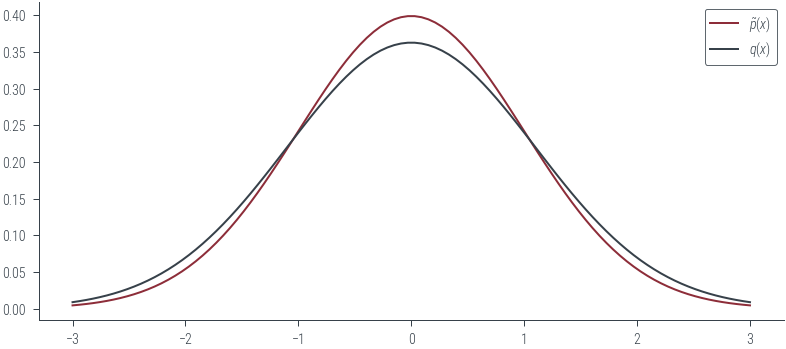

In [27]:
# plot the distributions

xs = torch.linspace(-3, 3, 100).view(-1, 1)
plt.plot(xs, p.log_prob(xs).exp(), label=r'$\tilde{p}(x)$')
plt.plot(xs, q.log_prob(xs).exp(), label=r'$q(x)$')
plt.legend()
plt.savefig('../figures/sampling/rejection-sampling-gaussian-p-q.pdf', bbox_inches='tight')

# Compute the constant M


In [28]:
M_emp = torch.max(p.log_prob(xs) - q.log_prob(xs)).exp()
M_emp

tensor(1.0999)

In [29]:
M =  sigma_q/sigma_p   
M 

1.1

In [30]:
# Now, plot for varying D

Ms = {}
for DIM in [1, 2, 5, 10, 20, 50, 100]:
    Ms[DIM] = (sigma_q/sigma_p)**DIM


In [31]:
Ms

{1: 1.1,
 2: 1.2100000000000002,
 5: 1.6105100000000006,
 10: 2.5937424601000023,
 20: 6.727499949325611,
 50: 117.39085287969579,
 100: 13780.61233982238}

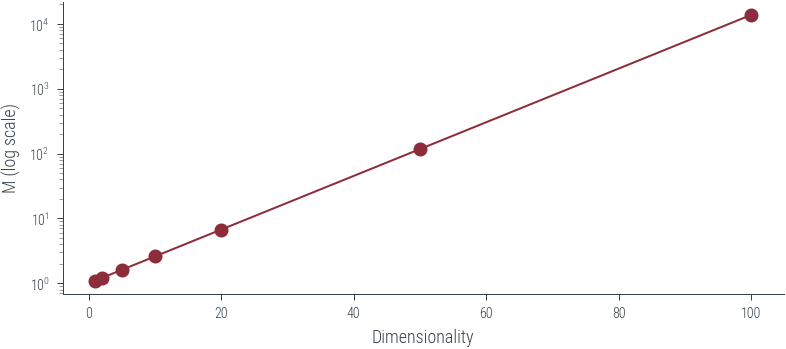

In [36]:
import pandas as pd
pd.Series(Ms).plot(logy=True, marker='o')
plt.xlabel("Dimensionality")
plt.ylabel("M (log scale)")
plt.savefig('../figures/sampling/rejection-sampling-gaussian-p-q-M.pdf', bbox_inches='tight')

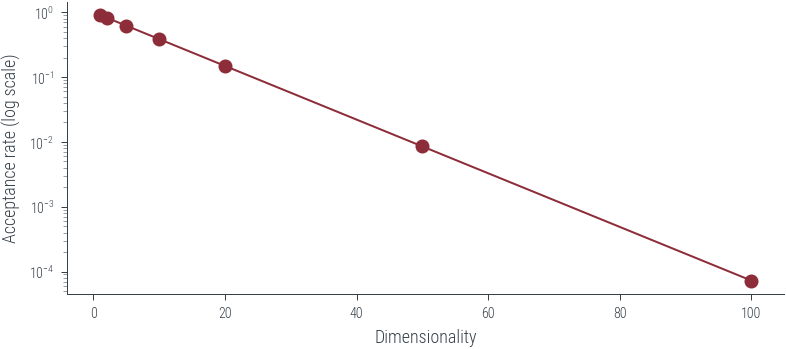

In [37]:
import pandas as pd
new_series = 1/pd.Series(Ms)
new_series.plot(logy=True, marker='o')
plt.xlabel("Dimensionality")
plt.ylabel("Acceptance rate (log scale)")
plt.savefig('../figures/sampling/rejection-sampling-gaussian-p-q-acceptance.pdf', bbox_inches='tight')

In [39]:
mog

MixtureSameFamily(
  Categorical(probs: torch.Size([2]), logits: torch.Size([2])),
  Normal(loc: torch.Size([2]), scale: torch.Size([2])))

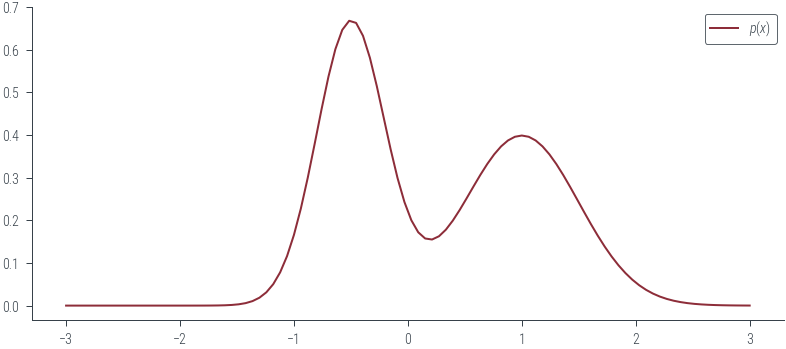

In [94]:
# Plot the mizxture of Gaussians
xs = torch.linspace(-3, 3, 100)
plt.plot(xs, mog.log_prob(xs).exp(), label=r'$p(x)$', color='C0')
plt.legend()

In [48]:
# Let f(x) = x^2

def f(x):
    return (10-x**2)/20.0



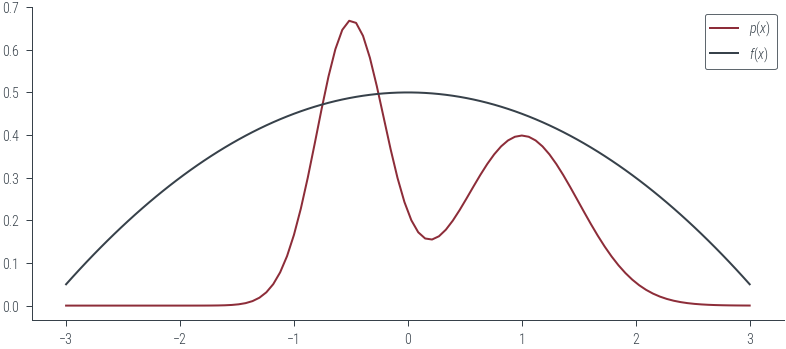

In [95]:
plt.plot(xs, mog.log_prob(xs).exp(), label=r'$p(x)$', color='C0')
# Plot f(x)
plt.plot(xs, f(xs), label=r'$f(x)$', color='C1')
plt.legend()

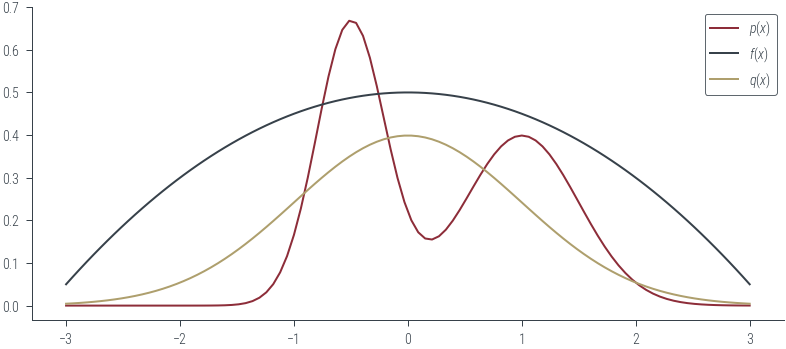

In [96]:
# Let q(x) = N(0, 1)
q = D.Normal(0, 1)


plt.plot(xs, mog.log_prob(xs).exp(), label=r'$p(x)$', color='C0')
# Plot f(x)
plt.plot(xs, f(xs), label=r'$f(x)$', color='C1')
# Plot q(x)
plt.plot(xs, q.log_prob(xs).exp(), label=r'$q(x)$', color='C2')
plt.legend()

In [97]:
# Get a sample from q(x) and evaluate w(x) = f(x)/q(x) and evaluate f(x) at the sample

x = q.sample()

def plot_sample(x):
    w = mog.log_prob(x).exp() / q.log_prob(x).exp()

    plt.plot(xs, mog.log_prob(xs).exp(), label=r'$p(x)$', color='C0')
    # Plot f(x)
    plt.plot(xs, f(xs), label=r'$f(x)$', color='C1')
    # Plot q(x)
    plt.plot(xs, q.log_prob(xs).exp(), label=r'$q(x)$', color='C2')
    # Plot sample x
    plt.scatter(x, 0, marker='x', color='k', label=r"$x\sim q(x)$")
    # Draw vertical line at x
    plt.axvline(x, color='k', linestyle='--')
    
    # Put title containing sample x, f(x), q(x), w(x), f(x)*w(x)
    plt.title(f"Sample x={x:0.3f}, f(x)={f(x):0.3f}, q(x)={q.log_prob(x).exp():0.3f}, w(x)={w:0.3f}, f(x)*w(x)={f(x)*w:0.3f}")    
    plt.legend()



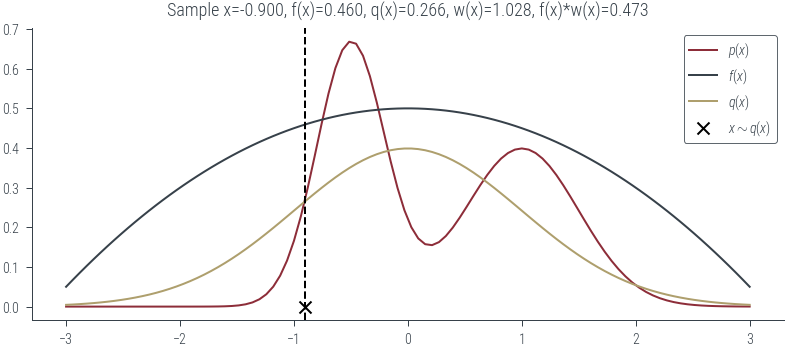

In [98]:
# Case 1: p(x) and q(x) are comparable and high
plot_sample(torch.tensor(-0.9))

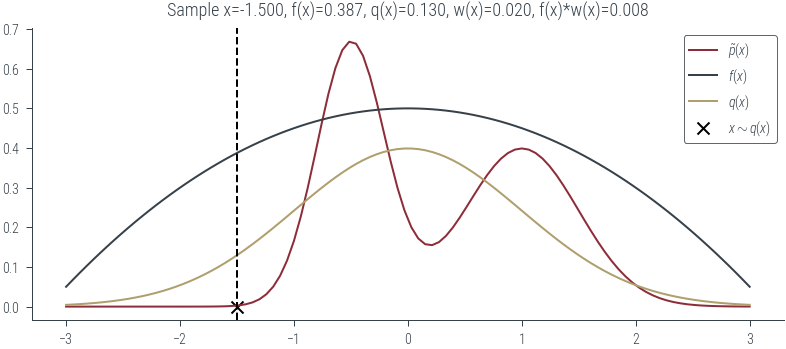

In [86]:
# Case 2: p(x) is low and q(x) is high
# In case of rejection sampling, we would reject this sample
plot_sample(torch.tensor(-1.5))

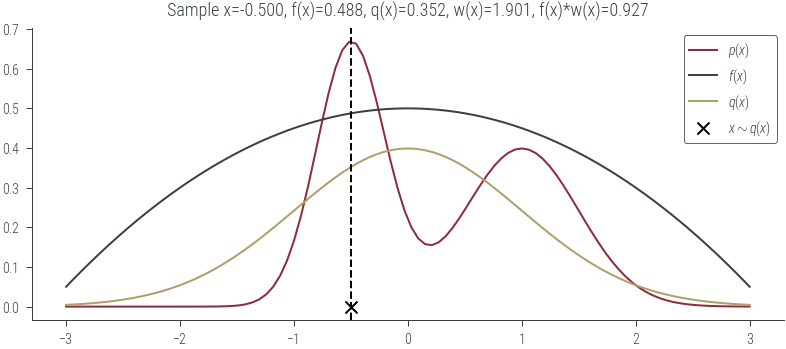

In [99]:
# Case 3: p(x) is high and q(x) is low
# Rare sample that we would accept in rejection sampling so high weight
plot_sample(torch.tensor(-0.5))

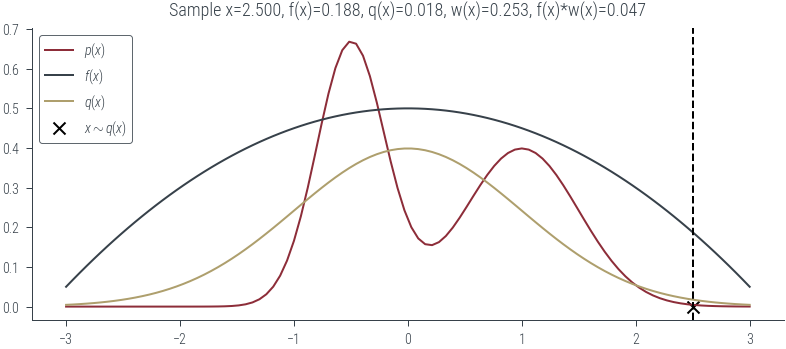

In [100]:
# Case 4: p(x) is low and q(x) is low
plot_sample(torch.tensor(2.5))